In [2]:
import json
import os
from os.path import join
import matplotlib.pyplot as plt
import csv
import pandas as pd

output_folder = "../../output"
input_folder = "../../input"

In [21]:
with open(join(output_folder, "engine_ids.json"), "r") as f:
    data = json.load(f)

print(os.listdir(join(output_folder, "cves_per_engId")))

analysedEngIds = [name for name in os.listdir(join(output_folder, "cves_per_engId"))]
len(analysedEngIds)

['00000009020000027d89dd80', '0000000902000002b96e99e0', '0000000902000003e3912986', '000000090200000a8b09c7ce', '00000009020000107ba82d10', '0000000902000011bcf0d800', '0000000902000030a3123000', '0000000902000050735d7d81', '00000009020000b04a599000', '00000009020000d0ba938540', '000000090300001e13928dc0', '0000000903000027e3a2a9f8', '0000000903000027e3a2ba78', '000000090300002f5cfc172a', '000000090300002f5cfdcd6c', '00000009030000562bab7f82', '00000009030000562bab7fb8', '00000009030000562bab8000', '00000009030000562bab8012', '00000009030000562bab80b4', '00000009030000562bab9ff8', '000000090300007686022590', '00000009030000778d561944', '000000090300009e1e5ca8a2', '00000009030000a2ee3f7578', '00000009030000a2ee3f7704', '00000009030000a38e97b52a', '00000009030000a3d12250e8', '00000009030000a3d1225b0e', '00000009030000a7420b4420', '00000009030000a7420f4500', '00000009030000a7421fd1b0', '00000009030000a74221a710', '00000009030000a74242f5b0', '00000009030000a7424d7d20', '00000009030000a742

1345

In [13]:
counter = 0

for k, i in data.items():
    if k not in analysedEngIds:
        print(k)
        print(i)
        counter += 1

print(counter)

8000517a0300171011608000
{'vendor': {'id': 20858, 'name': 'Casa Systems, Inc.', 'contact': 'mib support', 'email': 'mibsupport&casa-systems.com'}, 'mac_address': '17:10:11:60:80:00', 'mac_blocks': []}
000000000000217011217046
{'vendor': {'id': 0, 'name': 'Reserved', 'contact': 'Internet Assigned Numbers Authority', 'email': 'iana&iana.org'}, 'id': 36765207457862}
800033870370fc8c289a2f
{'vendor': {'id': 13191, 'name': 'OneAccess', 'contact': 'Pascal Kesteloot', 'email': 'pascal.kesteloot&oneaccess-net.com'}, 'mac_address': 'fc:8c:28:9a:2f:00', 'mac_blocks': []}
00009e25c6914132fb4211d7
{'vendor': {'id': 40485, 'name': 'Online.net', 'contact': 'Manfred Touron', 'email': 'mtouron&online.net'}, 'id': 14308289178352357000}
8000517a0300171013e08000
{'vendor': {'id': 20858, 'name': 'Casa Systems, Inc.', 'contact': 'mib support', 'email': 'mibsupport&casa-systems.com'}, 'mac_address': '17:10:13:e0:80:00', 'mac_blocks': []}
00009e253acc3476250effa2
{'vendor': {'id': 40485, 'name': 'Online.net'

In [56]:
engToCountry = {}
ips = 0
with open(join(output_folder, "testing_snmp_results_extended.csv"), "r") as f:
    reader = csv.reader(f)
    next(reader)
    for i, row in enumerate(reader):
        engineId = row[4]
        country = row[6]
        ip = row[1]

        if engineId == "Error":
            continue

        
        if engineId not in engToCountry:
            engToCountry[engineId] = {"ips": []}
        engToCountry[engineId]["country"] = country
        if ip not in engToCountry[engineId]["ips"]:
            engToCountry[engineId]["ips"].append(ip)
            ips += 1

print(ips)
print(len(engToCountry))
engToCountry

2392
1507


{'80003a8c044e4f43233031': {'ips': ['193.227.230.1'], 'country': 'Ukraine'},
 '800000090300defbc49a80': {'ips': ['219.65.112.82',
   '180.179.197.205',
   '180.179.197.209'],
  'country': 'India'},
 '8000000903e41f7b10e4e0': {'ips': ['180.179.197.210',
   '180.179.197.206',
   '180.179.210.65'],
  'country': 'India'},
 '8000000903003c13ccee3e00': {'ips': ['184.104.205.102'],
  'country': 'Estonia'},
 '00000009030010f31101cdc8': {'ips': ['46.20.242.161',
   '46.20.253.14',
   '46.20.247.168',
   '46.20.253.38'],
  'country': 'Netherlands (Kingdom of the)'},
 '000000090300a80c0d7141ef': {'ips': ['46.20.247.169',
   '46.20.254.114',
   '46.20.240.142'],
  'country': 'Netherlands (Kingdom of the)'},
 '0000000903005087897eccd0': {'ips': ['46.20.254.115', '46.20.254.2'],
  'country': 'Switzerland'},
 '0000000903000896ad5ede60': {'ips': ['46.20.254.3', '46.20.254.248'],
  'country': 'Netherlands (Kingdom of the)'},
 '000000090300d867d9155c80': {'ips': ['46.20.254.171',
   '87.119.122.126',
  

In [57]:
checkOrder = ["baseSeverityV31", "baseSeverityV30", "baseSeverityV2"]

metricToNumber = {
    "CRITICAL": 3,
    "HIGH": 3,
    "MEDIUM": 2,
    "LOW": 1,
    "NONE": 0
}

distribution = [0] * 4
distributionIP = [0] * 4

for engineId in engToCountry.keys():
    if engineId not in analysedEngIds:
        continue
    with open(join(output_folder, "cves_per_engId", engineId, "cves_important_info.json"), "r") as f:
        data = json.load(f)
    
    max = 0
    for cve in data:
        noMetriv = True
        for metric in checkOrder:
            if(cve[metric] != None):
                noMetriv = False
                if(cve[metric] == "LOW"):
                    print("LOW")
                if metricToNumber[cve[metric]] > max:
                    max = metricToNumber[cve[metric]]
                break
        
        if noMetriv:
            print("No metric for CVE: " + cve["cveId"] + " in engineId: " + engineId)
    
    distribution[max] += 1
    distributionIP[max] += len(engToCountry[engineId]["ips"])

print(distributionIP)
distribution



[808, 0, 104, 1132]


[465, 0, 77, 803]

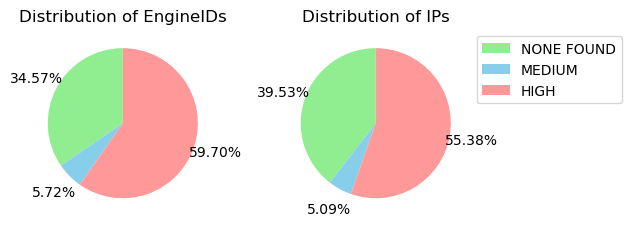

In [58]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_format

fig, (ax1, ax2) = plt.subplots(1, 2)

total = sum(distribution)

labels = ["NONE FOUND", "LOW", "MEDIUM", "HIGH"]
labels1_filtered, sizes1_filtered = zip(*((label, size) for label, size in zip(labels, distribution) if size > 0))
legend_labels = labels1_filtered
colors = ['lightgreen','skyblue','#ff9999','#ffcc99']
# plt.figure(figsize=(6, 6))
# Plotting the pie chart
ax1.pie(sizes1_filtered,  autopct=autopct_format(sizes1_filtered), startangle=90, pctdistance=1.3, colors=colors)
ax1.set_title("Distribution of EngineIDs")

total = sum(distributionIP)

labels = ["NONE FOUND", "LOW", "MEDIUM", "HIGH"]
labels1_filtered, sizes1_filtered = zip(*((label, size) for label, size in zip(labels, distributionIP) if size > 0))
legend_labels = labels1_filtered

# plt.figure(figsize=(6, 6))
# Plotting the pie chart
ax2.pie(sizes1_filtered,  autopct=autopct_format(sizes1_filtered), startangle=90,  pctdistance=1.3, colors=colors)
ax2.set_title("Distribution of IPs")

# Adding a legend with labels including percentages
plt.legend(labels=legend_labels, bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [9]:
engToCountry = {}
ips = 0
count = 0
with open(join(output_folder, "testing_snmp_results_extended.csv"), "r") as f:
    reader = csv.reader(f)
    next(reader)
    for i, row in enumerate(reader):
        engineId = row[4]
        country = row[6]
        ip = row[1]

        # print(engineId)

        if engineId == "Error":
            continue

        if "Netherlands" in country:
            print(country)
            count += 1

        if "Netherlands" in country:
            if engineId not in engToCountry:
                engToCountry[engineId] = {"ips": []}
            engToCountry[engineId]["country"] = country
            if ip not in engToCountry[engineId]["ips"]:
                engToCountry[engineId]["ips"].append(ip)
                ips += 1

print(count)
print(ips)
print(len(engToCountry))
engToCountry

Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (Kingdom of the)
Netherlands (K

{'00000009030010f31101cdc8': {'ips': ['46.20.242.161',
   '46.20.253.14',
   '46.20.247.168',
   '46.20.253.38'],
  'country': 'Netherlands (Kingdom of the)'},
 '000000090300a80c0d7141ef': {'ips': ['46.20.247.169',
   '46.20.254.114',
   '46.20.240.142'],
  'country': 'Netherlands (Kingdom of the)'},
 '0000000903005087897eccd0': {'ips': ['46.20.254.115'],
  'country': 'Netherlands (Kingdom of the)'},
 '000000090300d867d9155c80': {'ips': ['46.20.254.171', '46.20.253.15'],
  'country': 'Netherlands (Kingdom of the)'},
 '000000090300007686022590': {'ips': ['46.20.254.119'],
  'country': 'Netherlands (Kingdom of the)'},
 '80003a8c04': {'ips': ['37.153.194.33', '154.51.12.33'],
  'country': 'Netherlands (Kingdom of the)'},
 '00000009030000c16457149b': {'ips': ['46.20.254.198', '46.20.242.209'],
  'country': 'Netherlands (Kingdom of the)'},
 '0000000903000896ad5ede60': {'ips': ['46.20.254.248'],
  'country': 'Netherlands (Kingdom of the)'},
 '800000090300002cc801e480': {'ips': ['213.198.92.6

In [12]:
count = 0
ippp = set()
with open(join(output_folder, "testing_snmp_results_extended.csv"), "r") as f:
    reader = csv.reader(f)

    for i, row in enumerate(reader):
        engineId = row[4]
        country = row[6]
        ip = row[1]

        if engineId == "Error":
            continue

        # if "Netherlands" in country:
            # print(country)
        ippp.add(ip)
        count += 1

print(count)
print(len(ippp))

12413
2386


In [52]:
checkOrder = ["baseSeverityV31", "baseSeverityV30", "baseSeverityV2"]

metricToNumber = {
    "CRITICAL": 3,
    "HIGH": 3,
    "MEDIUM": 2,
    "LOW": 1,
    "NONE": 0
}

distribution = [0] * 4
distributionIP = [0] * 4

for engineId in engToCountry.keys():
    if engineId not in analysedEngIds:
        continue
    with open(join(output_folder, "cves_per_engId", engineId, "cves_important_info.json"), "r") as f:
        data = json.load(f)
    
    max = 0
    for cve in data:
        noMetriv = True
        for metric in checkOrder:
            if(cve[metric] != None):
                noMetriv = False
                if metricToNumber[cve[metric]] > max:
                    max = metricToNumber[cve[metric]]
                break
        
        if noMetriv:
            print("No metric for CVE: " + cve["cveId"] + " in engineId: " + engineId)
    
    distribution[max] += 1
    distributionIP[max] += len(engToCountry[engineId]["ips"])

print(distributionIP)
distribution

[22, 0, 1, 51]


[13, 0, 1, 29]

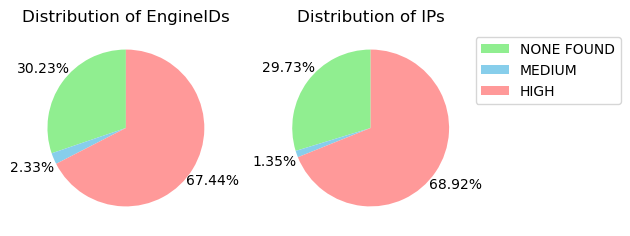

In [53]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_format

fig, (ax1, ax2) = plt.subplots(1, 2)

total = sum(distribution)

labels = ["NONE FOUND", "LOW", "MEDIUM", "HIGH"]
labels1_filtered, sizes1_filtered = zip(*((label, size) for label, size in zip(labels, distribution) if size > 0))
legend_labels = labels1_filtered
colors = ['lightgreen','skyblue','#ff9999','#ffcc99']
# plt.figure(figsize=(6, 6))
# Plotting the pie chart
ax1.pie(sizes1_filtered,  autopct=autopct_format(sizes1_filtered), startangle=90, pctdistance=1.3, colors=colors)
ax1.set_title("Distribution of EngineIDs")

total = sum(distributionIP)

labels = ["NONE FOUND", "LOW", "MEDIUM", "HIGH"]
labels1_filtered, sizes1_filtered = zip(*((label, size) for label, size in zip(labels, distributionIP) if size > 0))
legend_labels = labels1_filtered

# plt.figure(figsize=(6, 6))
# Plotting the pie chart
ax2.pie(sizes1_filtered,  autopct=autopct_format(sizes1_filtered), startangle=90,  pctdistance=1.3, colors=colors)
ax2.set_title("Distribution of IPs")

# Adding a legend with labels including percentages
plt.legend(labels=legend_labels, bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [30]:
total = sum(distribution)

labels = ["NONE FOUND", "LOW", "MEDIUM", "HIGH"]
percentages = [(value / total) * 100 for value in distribution]
legend_labels = [f"{label}: {percentage:.2f}%" for label, percentage in zip(labels, percentages)]

# plt.figure(figsize=(6, 6))
# Plotting the pie chart
ax1.pie(distribution)

# Adding a legend with labels including percentages
# plt.legend(labels=legend_labels, bbox_to_anchor=(1, 1))
# plt.tight_layout()

# plt.show()

([<matplotlib.patches.Wedge at 0x27d746895d0>,
 [Text(0.6400448207491376, 0.8946187050538372, ''),
  Text(-0.35516841351309913, 1.041083761300016, ''),
  Text(-0.43021516140309507, 1.012380815157473, ''),
  Text(-0.5730343341589649, -0.9389524225832702, '')])